In [123]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
import random
import matplotlib.pyplot as plt

In [2]:
#it is better to import this lib:
import html5lib


In [3]:
url2= 'https://www.thebalance.com/oil-price-history-3306200'

In [4]:
#We use the read_html method of the Pandas library to read the HTML tables.this will return a list of df.
#skiprows skip anyrow we wish, here we set it to 0 because we need all of it(we dont need it here).
#header makes the heads of the columns
# we need to add [0] if need to select first item of returened list, because read_html return list of DataFrames:

 
df_list = pd.read_html(url2, header=0)[0]
df_list

,Year,Average,Low,High,Causes
0,1970,$2.96,N.A.,N.A.,Regulated prices
1,1971,$3.17,N.A.,N.A.,NaN
2,1972,$3.22,N.A.,N.A.,NaN
3,1973,$4.08,N.A.,N.A.,NaN
4,1974,$12.52,$9.59,$13.06,OPEC oil embargo ended
5,1975,$13.95,$12.77,$15.04,Stagflation
6,1976,$13.48,$13.26,$13.71,Economy recovered
7,1977,$14.53,$14.11,$14.76,Fed raised and lowered rates
8,1978,$14.57,$14.40,$14.94,Fed raised and lowered rates
9,1979,$21.57,$15.50,$28.91,"Iran-Iraq War, fed rate 20%"


In [5]:
# to drop column:
df = df_list.drop(['Causes'], axis=1)


In [6]:
#to drop rows:
df1 = df.drop([0, 1, 2, 3])
df1

,Year,Average,Low,High
4,1974,$12.52,$9.59,$13.06
5,1975,$13.95,$12.77,$15.04
6,1976,$13.48,$13.26,$13.71
7,1977,$14.53,$14.11,$14.76
8,1978,$14.57,$14.40,$14.94
9,1979,$21.57,$15.50,$28.91
10,1980,$33.86,$30.75,$35.63
11,1981,$37.10,$35.43,$39.00
12,1982,$33.57,$32.78,$35.54
13,1983,$29.31,$27.95,$31.40


In [7]:
df1.dtypes

Year        int64
Average    object
Low        object
High       object
dtype: object

In [8]:
# we applied this function to get rid of $ signs:
df1.Average = df1.Average.str.replace('$','').astype(float)
df1.Low = df1.Low.str.replace('$','').astype(float)
df1.High = df1.High.str.replace('$','').astype(float)
df1

,Year,Average,Low,High
4,1974,12.52,9.59,13.06
5,1975,13.95,12.77,15.04
6,1976,13.48,13.26,13.71
7,1977,14.53,14.11,14.76
8,1978,14.57,14.40,14.94
9,1979,21.57,15.50,28.91
10,1980,33.86,30.75,35.63
11,1981,37.10,35.43,39.00
12,1982,33.57,32.78,35.54
13,1983,29.31,27.95,31.40


In [83]:
# we only select the last 31 entries, so we drop the first rows. We also drop the other two columns:
df2 = df1.drop([4, 5, 6, 7, 8,9,10,11,12,13,14,15,16,17,18])
df2 = df1.drop(['Low', 'High'], axis=1)

df2

,Year,Average
4,1974,12.52
5,1975,13.95
6,1976,13.48
7,1977,14.53
8,1978,14.57
9,1979,21.57
10,1980,33.86
11,1981,37.10
12,1982,33.57
13,1983,29.31


In [84]:
df2.dtypes

Year         int64
Average    float64
dtype: object

In [85]:
d2 = df2.loc[21:]
d2

,Year,Average
21,1991,18.73
22,1992,18.21
23,1993,16.13
24,1994,15.54
25,1995,17.14
26,1996,20.62
27,1997,18.49
28,1998,12.07
29,1999,17.27
30,2000,27.72


In [98]:
subset = d2.rename(columns={'Year':'Date', 'Average':'Oil'})
subset

,Date,Oil
21,1991,18.73
22,1992,18.21
23,1993,16.13
24,1994,15.54
25,1995,17.14
26,1996,20.62
27,1997,18.49
28,1998,12.07
29,1999,17.27
30,2000,27.72


In [ ]:
# subset.to_csv('final.oil_csv')

In [118]:
yes = pd.read_csv('final.oil_csv')
yes

,Date,Oil
0,1991,18.73
1,1992,18.21
2,1993,16.13
3,1994,15.54
4,1995,17.14
5,1996,20.62
6,1997,18.49
7,1998,12.07
8,1999,17.27
9,2000,27.72


In [104]:
gold = pd.read_csv('gld_price_data.csv')
gold.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [107]:
gold.columns

Index(['Date', 'SPX', 'GLD', 'USO', 'SLV', 'EUR/USD'], dtype='object')

In [112]:
gold_sub = gold.loc[:,'SLV']
gold_sub
# df.loc[df['Age']

0       15.1800
1       15.2850
2       15.1670
3       15.0530
4       15.5900
         ...   
2285    15.5100
2286    15.5300
2287    15.7400
2288    15.5600
2289    15.4542
Name: SLV, Length: 2290, dtype: float64

In [115]:
num = gold_sub.loc[0:29,]
len(num)

30

In [122]:
data = pd.concat([yes, num], axis=1)
data

,Date,Oil,SLV
0,1991,18.73,15.180000
1,1992,18.21,15.285000
2,1993,16.13,15.167000
3,1994,15.54,15.053000
4,1995,17.14,15.590000
5,1996,20.62,15.520000
6,1997,18.49,16.061001
7,1998,12.07,16.077000
8,1999,17.27,16.280001
9,2000,27.72,15.834000


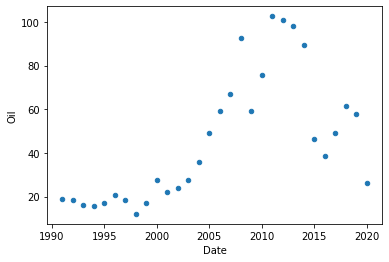

In [132]:
data.plot.scatter(x='Date', y='Oil' )

plt.show()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


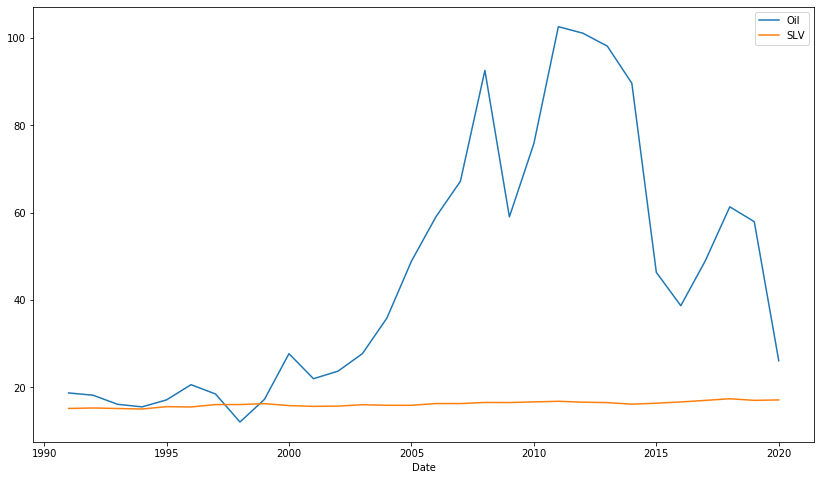

In [141]:
grouped = data.groupby(['Date']) ['Oil', 'SLV'].sum()
grouped.plot(figsize=(14,8))
plt.show()